In [1]:
from graphviz import Digraph
import itertools
import textwrap
import pprint
import doctest

In [10]:
def n_indents(x: str, indent_spaces=4):
    '''
    >>> n_indents('text')
    0
    >>> n_indents('    text')
    1
    >>> n_indents('        text')
    2
    '''
    # no validation: unsafe
    # return (len(x) - len(x.lstrip())) // indent_spaces
    n_spaces = len(x) - len(x.lstrip())
    div, mod = divmod(n_spaces, indent_spaces)
    assert mod == 0
    return div

In [13]:
def group_childs(it, key=bool):
    '''
    >>> group_childs('100000001000100', lambda x: bool(int(x)))
    [('1', ['0', '0', '0', '0', '0', '0', '0']), ('1', ['0', '0', '0']), ('1', ['0', '0'])]
    >>> group_childs('100000001000101', lambda x: bool(int(x)))
    [('1', ['0', '0', '0', '0', '0', '0', '0']), ('1', ['0', '0', '0']), ('1', ['0']), ('1', [])]
    '''
    it = iter(it)
    out = []
    while True:
        try:
            x = next(it)
        except StopIteration:
            return out
        else:
            if key(x):
                out.append((x, []))
            else:
                out[-1][1].append(x)
    return out

In [4]:
def parse_node(lines):
    out = []
    for key, childs in group_childs(lines, key=lambda x: n_indents(x) == 0):
        out.append((key, parse_node(map(lambda x: x.removeprefix('    '), childs))))
    return out

def parse_file(f):
    lines = open(f).read().splitlines()
    return 'root', parse_node(lines)

In [11]:
parse_file('tree.txt')

('root',
 [('music',
   [('scales', []),
    ('rhythm', []),
    ('sound design', [('reverb', []), ('delay', []), ('layering', [])]),
    ('cool music', [('grum', [('deep state radio', [])])])]),
  ('math',
   [('linear algebra', [('dot product', []), ('vector spaces', [])]),
    ('statistics',
     [('distributions',
       [('bernoulli', []),
        ('binomial',
         [('p(k successes in n trials)', []),
          ('cumulative probability - not == number of successes but <, <=, >, >=',
           []),
          ('binomial distribution is frequently used to model the number of successes in a sample of size n drawn with replacement from a population of size N. If the sampling is carried out without replacement, the draws are not independent and so the resulting distribution is a hypergeometric distribution, not a binomial one. However, for N much larger than n, the binomial distribution remains a good approximation, and is widely used.',
           [])]),
        ('poisson', [])]),

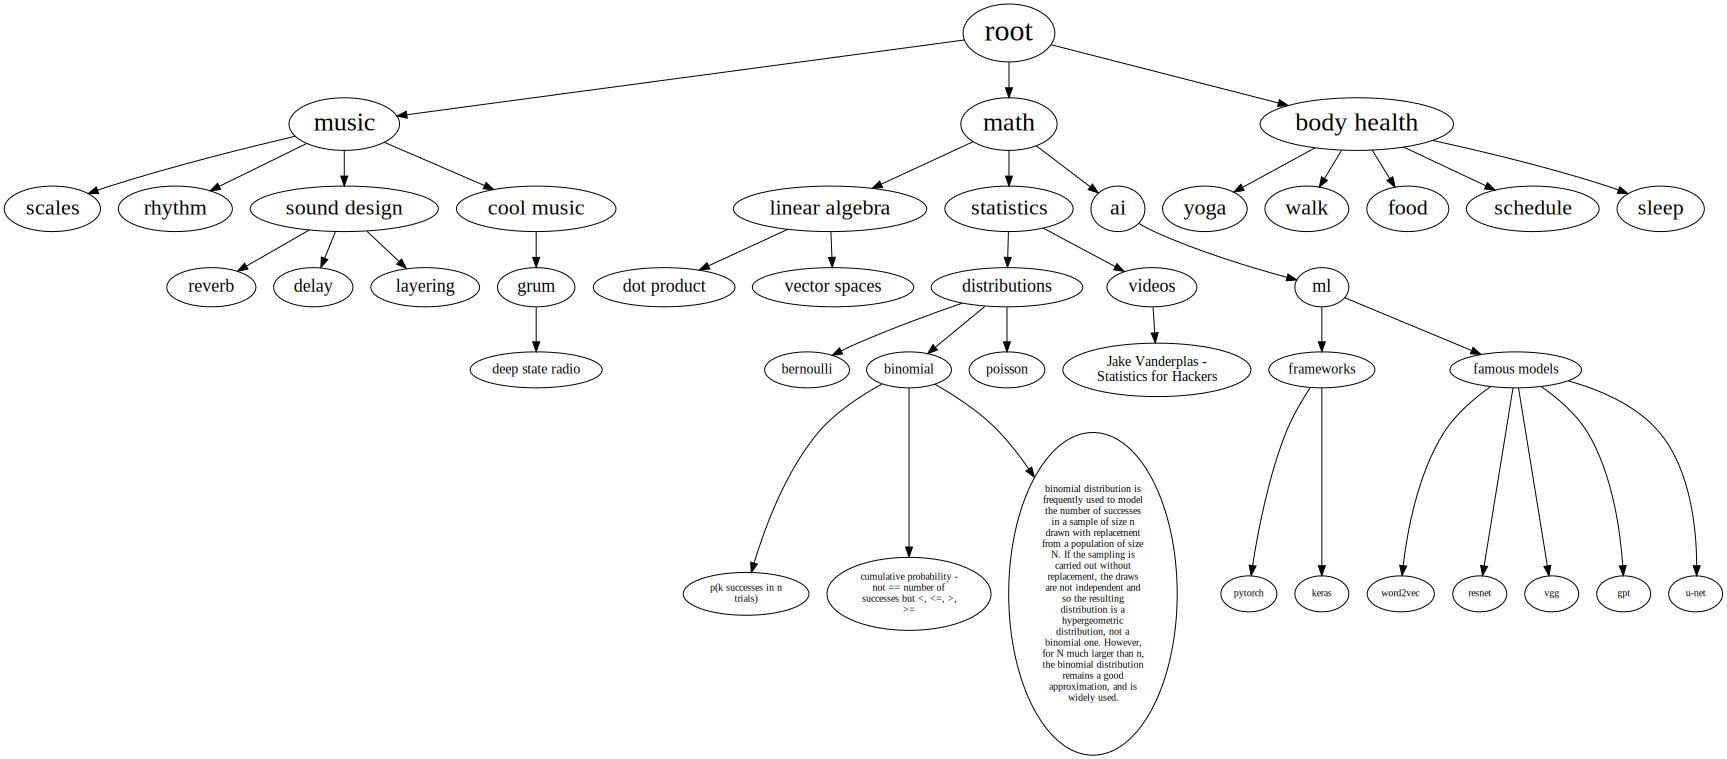

In [12]:
g = Digraph()

def plot_subtree(subtree, size):
    node, childs = subtree
    g.node(node, label=textwrap.fill(node, width=25), fontsize=str(size))
    
    
    for child in childs:
        plot_subtree(child, size - 4)
        g.edge(node, child[0])
        
plot_subtree(parse_file('tree.txt'), size=30)
g

In [14]:
with open('tree.pdf', 'wb') as fd:
    fd.write(g.pipe(format='pdf'))